In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv('cleaned_propeller.csv')
normal = df[df['label'] == 0]
faulty = df[df['label'] == 1]

**Examine data**


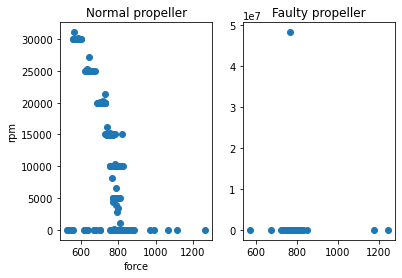

In [3]:
fig = plt.figure()
ax_norm = fig.add_subplot(121)
ax_norm.scatter(normal['force'], normal['rpm'])
ax_norm.set_xlabel('force')
ax_norm.set_ylabel('rpm')
ax_norm.set_title('Normal propeller')
ax_faulty = fig.add_subplot(122)
ax_faulty.scatter(faulty['force'], faulty['rpm'])
ax_faulty.set_title('Faulty propeller')
plt.show()

As can be seen from the figure on the right of "Faulty propeller", there is and extreme value which makes the figure unreadable.
Let's remove that only extreme just to have better view (without excluding it from train data)

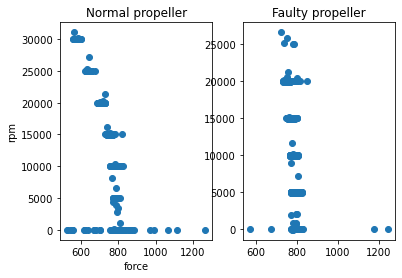

In [4]:
faulty_no_extreme = faulty[faulty['rpm'] < 40000]

fig = plt.figure()
ax_norm = fig.add_subplot(121)
ax_norm.scatter(normal['force'], normal['rpm'])
ax_norm.set_xlabel('force')
ax_norm.set_ylabel('rpm')
ax_norm.set_title('Normal propeller')
ax_faulty = fig.add_subplot(122)
ax_faulty.scatter(faulty_no_extreme['force'], faulty_no_extreme['rpm'])
ax_faulty.set_title('Faulty propeller')
plt.show()

**Merge normal and faulty data with label, shuffle and split data into train/test sets**

In [5]:
df = pd.concat([normal, faulty])
df.reset_index(drop=True, inplace=True)
X = df[['force','rpm']]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
print(X_train.head())
print(y_train.head())

      force    rpm
1183    783      1
227     767  15006
692     787  10010
522     791   4986
788     778  14997
1183    1
227     0
692     1
522     1
788     1
Name: label, dtype: int64


In [6]:
# sklearn additional imports
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [7]:

# scale features
scaler = preprocessing.StandardScaler().fit(X_train)
# transform training features
X_train_scaled = scaler.transform(X_train)
# Transform test features
X_test_scaled = scaler.transform(X_test)

In [8]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf"),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(max_depth=10, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

accs = []
rocs = []
for clf in classifiers:
    #Train the model using the training sets
    clf.fit(X_train_scaled, y_train)
    
    #Predict the response for test dataset
    y_pred = clf.predict(X_test_scaled)
    accs.append(metrics.accuracy_score(y_test, y_pred))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    rocs.append((fpr, tpr))

    

In [9]:
# Model Accuracy: how often is the classifier correct?
print("Max Accuracy:",np.max(accs))
print("Max Accuracy Model: ", classifiers[np.argmax(accs)])

Max Accuracy: 0.83
Max Accuracy Model:  RandomForestClassifier(max_depth=10)


Text(0, 0.5, 'True Positive Rate')

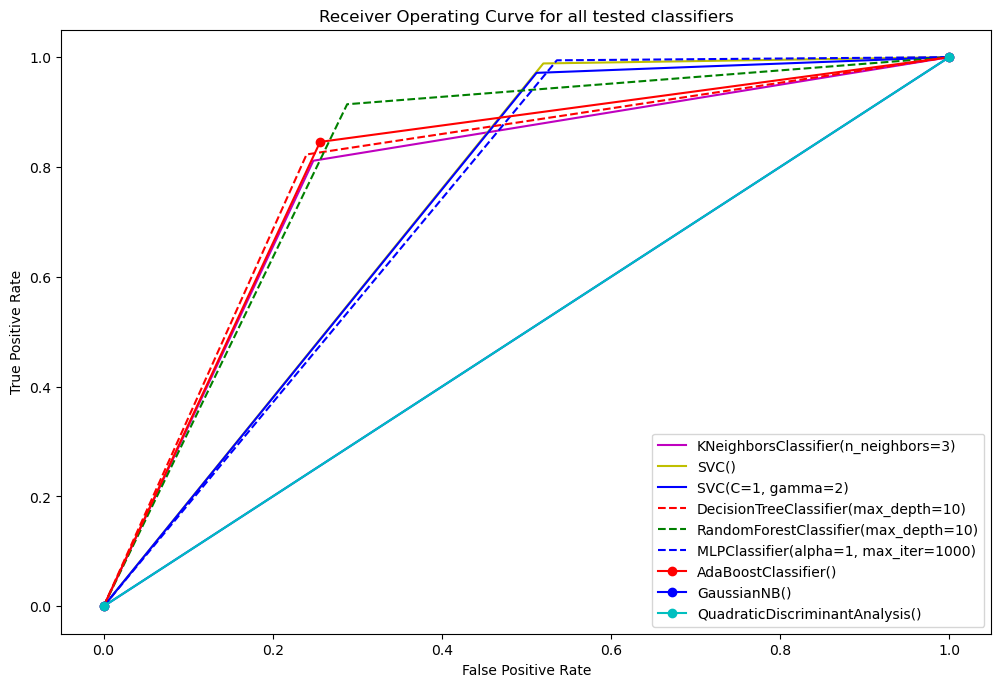

In [10]:
# Plotting ROC curves for all models
clf_styles = ['m', 'y', 'b', 'r--', 'g--', 'b--', 'r-o', 'b-o', 'c-o']

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

plt.title('Receiver Operating Curve for all tested classifiers')
for i,roc in enumerate(rocs):
    plt.plot(roc[0], roc[1],clf_styles[i], label=f'{classifiers[i]}')

plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')